In [51]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

mypath_O1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/O_1T/"
mypath_R1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/R_1T/"
mypath_O24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/O_24T/"
mypath_R24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/R_24T/"
def read_files(path):  
    
    # N, E, M in struct [Type, Value, File]
    E = np.zeros(99000* 10)
    
    file_counter = 0
    line_counter = 0
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[3:]
            for line in lines:
                line = line.split()
                E[line_counter] = (float(line[1]))
                line_counter += 1
        file_counter += 1
    
    # N

    return np.array(E)

DO1T = read_files(mypath_O1T)
DR1T = read_files(mypath_R1T)
DO24T = read_files(mypath_O24T)
DR24T = read_files(mypath_R24T)

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


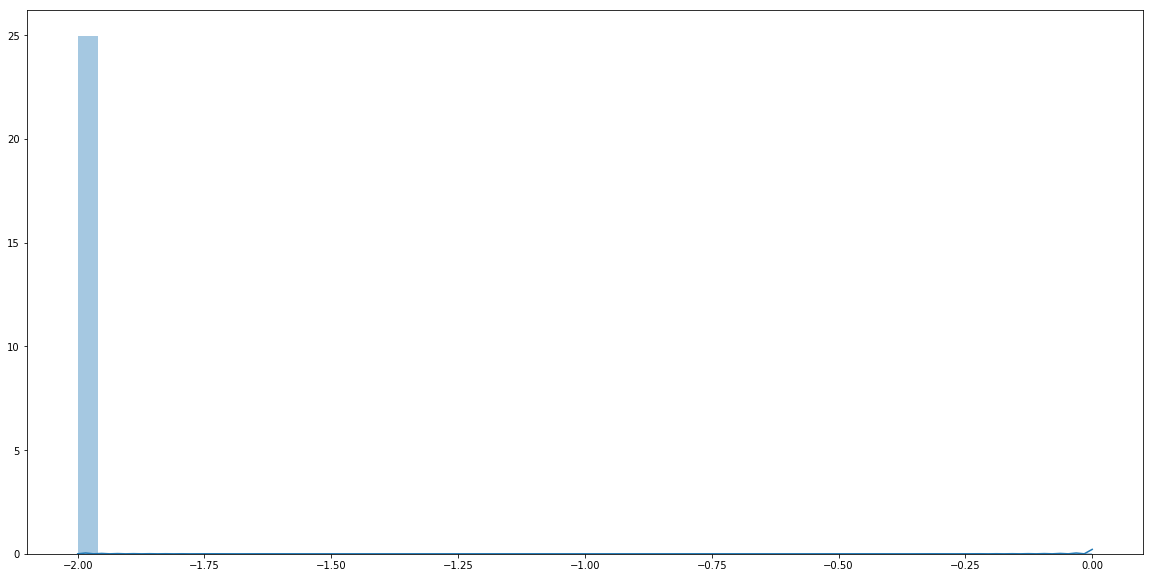

In [52]:
plt.figure(figsize = (20,10))

sns.distplot(DO1T, hist=True);

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


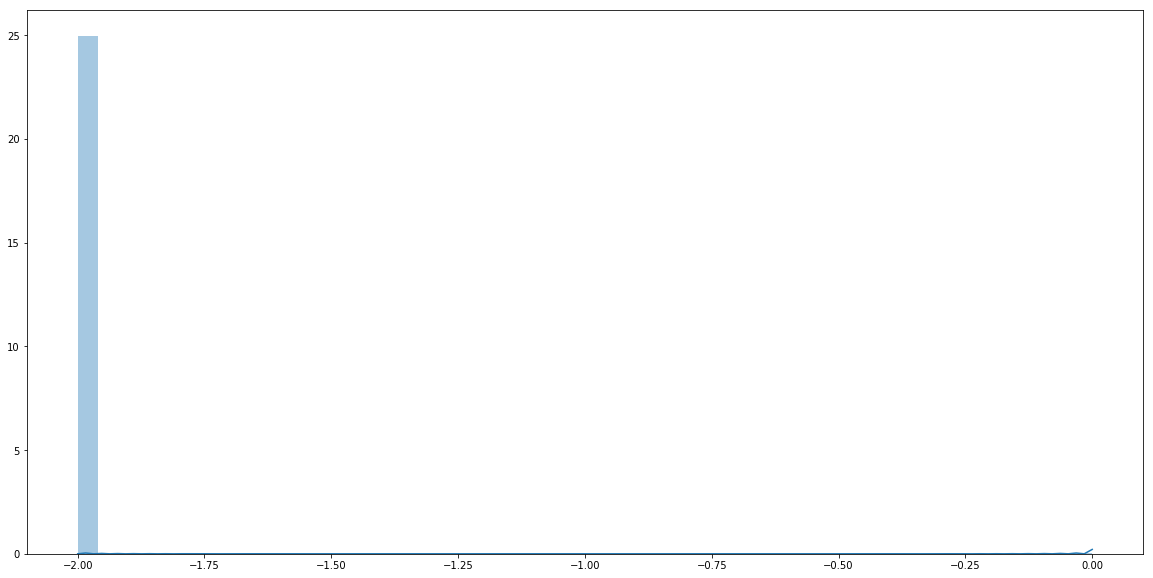

In [53]:
plt.figure(figsize = (20,10))

sns.distplot(DR1T, hist=True);

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


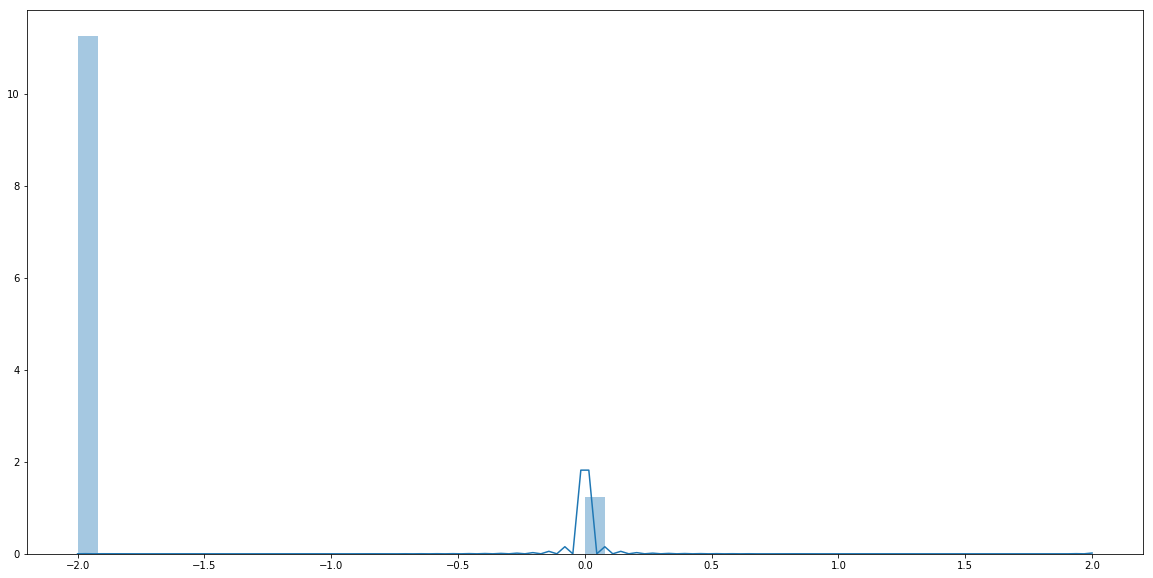

In [55]:
plt.figure(figsize = (20,10))
sns.distplot(DR24T, hist=True);

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


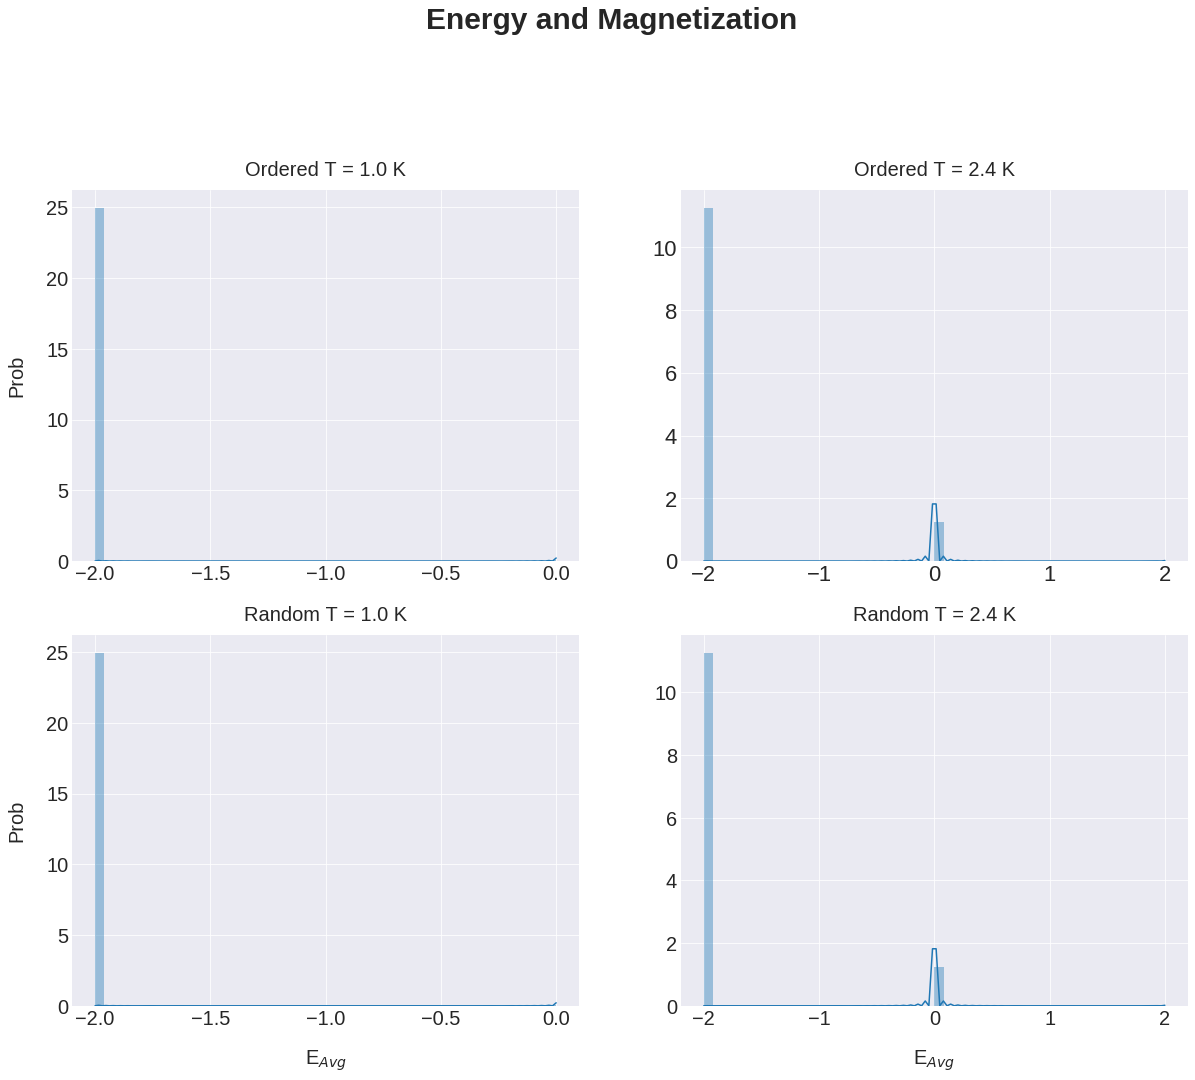

<Figure size 432x288 with 0 Axes>

In [64]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Energy and Magnetization\n',y=1.05, fontsize=fsize +10, fontweight='bold')

axs[0, 0].set_title('Ordered T = 1.0 K', fontsize = fsize, pad = 15)
sns.distplot(DO1T, hist=True, ax=axs[0, 0]);


axs[1, 0].set_title('Random T = 1.0 K', fontsize = fsize, pad = 15)
sns.distplot(DR1T, hist=True, ax=axs[1, 0]);


axs[0, 1].set_title('Ordered T = 2.4 K', fontsize = fsize, pad = 15)
sns.distplot(DO24T, hist=True, ax=axs[0, 1]);


axs[1, 1].set_title('Random T = 2.4 K', fontsize = fsize, pad = 15)
sns.distplot(DR24T, hist=True, ax=axs[1, 1]);


axs[1, 0].set_xlabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('Prob', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('Prob', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.


plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')